# Group 2 Project - Dognition
this notebook is for exploring dogniton data
#    II. How do the features of the owners correlate to the number of tests completed?
#        2.3) Dog history, such as dog ownership, interest in breeding, # of dogs owned now or in a lifetime, etc …

In [47]:
#set up of requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import os
import openpyxl

In [48]:
#establish connection to data
dognitiondf = pd.read_excel("dognition_data_aggregated_by_dogid.xlsx")
data = dognitiondf
display(dognitiondf)

,Dog ID,Total Tests Completed,Mean ITI (days),Mean ITI (minutes),Median ITI (days),Median ITI (minutes),Time diff between first and last game (days),Time diff between first and last game (minutes),User ID,Gender,...,Membership_ID,Subscribed,City,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type
0,fd27b272-7144-11e5-ba71-058fbc01cf0b,21,28.201076,40609.549167,0.004687,6.750000,564.021516,812190.983333,ce134e42-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Grand Forks,ND,58201,US,0,0,2015-03-12 00:25:00,2
1,fd27b5ba-7144-11e5-ba71-058fbc01cf0b,20,0.413307,595.162281,0.005845,8.416667,7.852836,11308.083333,ce1353d8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Barre,MA,01005,US,0,0,00:00:00,1
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2,0.009132,13.150000,0.009132,13.150000,0.009132,13.150000,ce135ab8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Darien,CT,06820,US,0,0,00:00:00,1
3,fd27b79a-7144-11e5-ba71-058fbc01cf0b,11,56.115179,80805.858333,0.004433,6.383333,561.151794,808058.583333,ce13507c-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Winnetka,IL,60093,US,0,0,2014-09-12 19:26:00,1
4,fd27b86c-7144-11e5-ba71-058fbc01cf0b,31,7.734254,11137.326111,0.000399,0.575000,232.027627,334119.783333,ce135e14-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Raleigh,NC,27606,US,1,0,00:00:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17981,fdc235e0-7144-11e5-ba71-058fbc01cf0b,7,0.009408,13.547222,0.004786,6.891667,0.056447,81.283333,ce9b2aba-7144-11e5-ba71-058fbc01cf0b,male,...,10.0,0.0,NaN,NaN,NaN,NaN,0,0,2015-10-12 14:44:00,1
17982,fdc23a68-7144-11e5-ba71-058fbc01cf0b,1,NaN,NaN,NaN,NaN,0.000000,0.000000,ce9b2eb6-7144-11e5-ba71-058fbc01cf0b,male,...,9.0,0.0,NaN,NaN,NaN,NaN,0,1,2015-10-12 20:43:00,4
17983,fdc23ba8-7144-11e5-ba71-058fbc01cf0b,20,0.004957,7.137719,0.004201,6.050000,0.094178,135.616667,ce9b306e-7144-11e5-ba71-058fbc01cf0b,female,...,10.0,1.0,Carolina Beach,NC,28428,US,0,0,2015-10-12 20:13:00,1
17984,fdc23e96-7144-11e5-ba71-058fbc01cf0b,4,0.002948,4.244444,0.002778,4.000000,0.008843,12.733333,ce9b33b6-7144-11e5-ba71-058fbc01cf0b,female,...,9.0,0.0,NaN,NaN,NaN,NaN,0,1,2015-10-12 19:17:00,4


In [28]:
dognitiondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17986 entries, 0 to 17985
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Dog ID                                           17986 non-null  object 
 1   Total Tests Completed                            17986 non-null  int64  
 2   Mean ITI (days)                                  16718 non-null  float64
 3   Mean ITI (minutes)                               16718 non-null  float64
 4   Median ITI (days)                                16718 non-null  float64
 5   Median ITI (minutes)                             16718 non-null  float64
 6   Time diff between first and last game (days)     17986 non-null  float64
 7   Time diff between first and last game (minutes)  17986 non-null  float64
 8   User ID                                          17985 non-null  object 
 9   Gender                      

In [34]:
#checking missing values
missing_values = dognitiondf.isnull().sum()
missing_percent = (dognitiondf.isnull().sum()/len(dognitiondf))*100
print(pd.concat([missing_values, missing_percent], axis = 1, 
                keys = ['Missing Values', 'Percentage']))

                                                 Missing Values  Percentage
Dog ID                                                        0    0.000000
Total Tests Completed                                         0    0.000000
Mean ITI (days)                                            1268    7.049928
Mean ITI (minutes)                                         1268    7.049928
Median ITI (days)                                          1268    7.049928
Median ITI (minutes)                                       1268    7.049928
Time diff between first and last game (days)                  0    0.000000
Time diff between first and last game (minutes)               0    0.000000
User ID                                                       1    0.005560
Gender                                                        1    0.005560
Birthday                                                      1    0.005560
Breed                                                        16    0.088958
Breed_Type  

In [106]:
breed_mode = dognitiondf["Breed"].mode()[0]
print(breed_mode)
dognittiondf = dognitiondf["Breed"].fillna(breed_mode, inplace=True)
print(dognitiondf["Breed"].isnull().sum())

Mixed
0


In [104]:
#Replace missing values
maxdogs_mean = dognitiondf["Max_Dogs"].mean()
print(maxdogs_mean)
dognittiondf = dognitiondf["Max_Dogs"].fillna(maxdogs_mean)
print(dognitiondf["Max_Dogs"].isnull().sum())

1.2734500973033083
0


In [105]:
breedtype_mode = dognitiondf["Breed_Type"].mode()[0]
print(breedtype_mode)
dognittiondf = dognitiondf["Breed_Type"].fillna(breedtype_mode, inplace=True)
print(dognitiondf["Breed_Type"].isnull().sum())

Pure Breed
0


In [107]:
dognitiondf.isnull().sum()

Dog ID                                                0
Total Tests Completed                                 0
Mean ITI (days)                                    1268
Mean ITI (minutes)                                 1268
Median ITI (days)                                  1268
Median ITI (minutes)                               1268
Time diff between first and last game (days)          0
Time diff between first and last game (minutes)       0
User ID                                               1
Gender                                                1
Birthday                                              1
Breed                                                 0
Breed_Type                                            0
Breed_Group                                           1
Weight                                                1
Dog_Fixed                                             1
DNA_Tested                                            1
Dimension                                       

In [38]:
#2.3 Dog history: 
# dog ownership (breed to max dogs)
# interest in breeding (breed to breed type) 
# # of dogs owned now or in a lifetime(max dogs)
#, etc …

In [135]:
# most owned breed based on maximum of dogs
mostfreqbreed = dognitiondf[["Max_Dogs", "Breed"]]
freqownbreed = mostfreqbreed.groupby(["Max_Dogs", "Breed"]).size().reset_index(name="Count")
print(freqownbreed)

      Max_Dogs                      Breed  Count
0          0.0     Afghan Hound-Akita mix      1
1          0.0           Airedale Terrier      2
2          0.0                      Akita      1
3          0.0        American Eskimo Dog      2
4          0.0  American Hairless Terrier      1
...        ...                        ...    ...
1973      20.0                      Other      1
1974      20.0                 Rottweiler      1
1975      20.0                   Shih Tzu      8
1976      36.0                   Shih Tzu     16
1977      36.0           Spinone Italiano      1

[1978 rows x 3 columns]


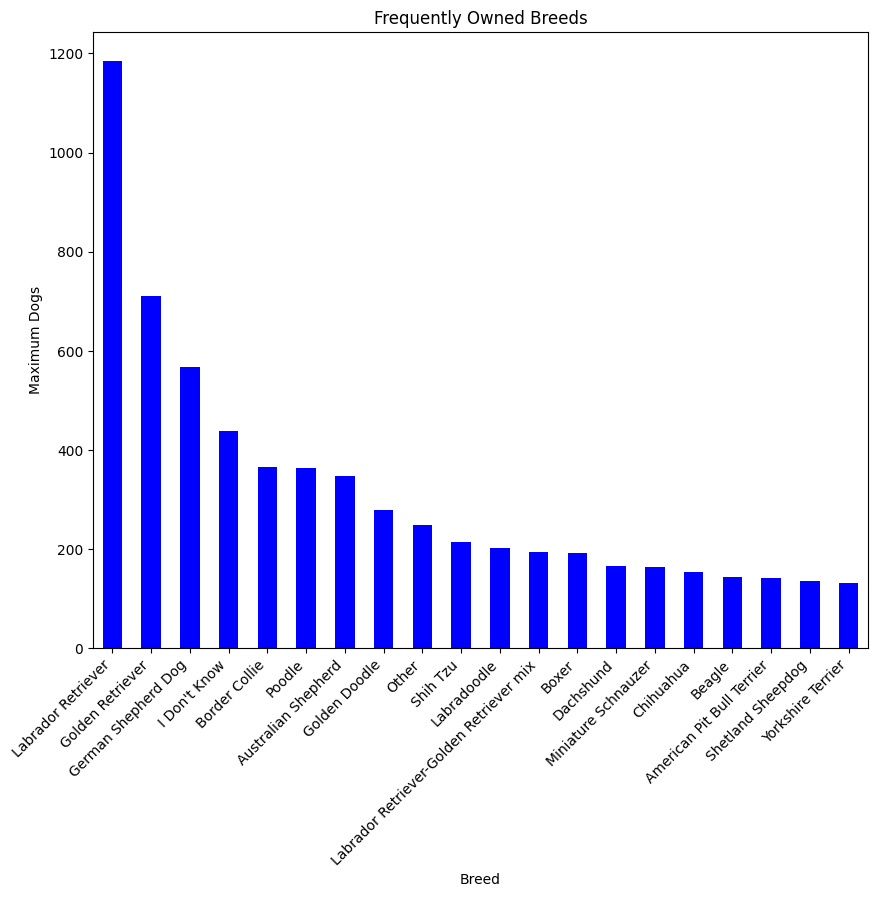

In [151]:
maxdogslimit = dognitiondf[dognitiondf['Max_Dogs'] <= 20]
breedcount = maxdogslimit['Breed'].value_counts().head(20)

plt.figure(figsize = (10, 8))
breedcount.plot( kind = 'bar', color = 'blue')
plt.title('Frequently Owned Breeds')
plt.xlabel('Breed') 
plt.ylabel('Maximum Dogs')
plt.xticks(rotation = 45, ha='right')
plt.show()

In [147]:
# interest in breeding (breed to breed type)
breedingtype = dognitiondf[["Breed_Type", "Breed"]]
freqbreedtype = breedingtype.groupby(["Breed_Type", "Breed"]).size().reset_index(name="Count")
print(freqbreedtype)

       Breed_Type                                       Breed  Count
0     Cross Breed          Affenpinscher-Brussels Griffon mix      1
1     Cross Breed                      Afghan Hound-Akita mix      1
2     Cross Breed           Afghan Hound-Golden Retriever mix      1
3     Cross Breed  Airedale Terrier-Catahoula Leopard Dog mix      1
4     Cross Breed    Airedale Terrier-German Shepherd Dog mix      1
...           ...                                         ...    ...
1322   Pure Breed                 Wirehaired Pointing Griffon      8
1323   Pure Breed                           Wirehaired Vizsla      1
1324   Pure Breed                              Xoloitzcuintli      5
1325   Pure Breed                           Yorkshire Terrier    132
1326   Pure Breed                                       mixed      1

[1327 rows x 3 columns]


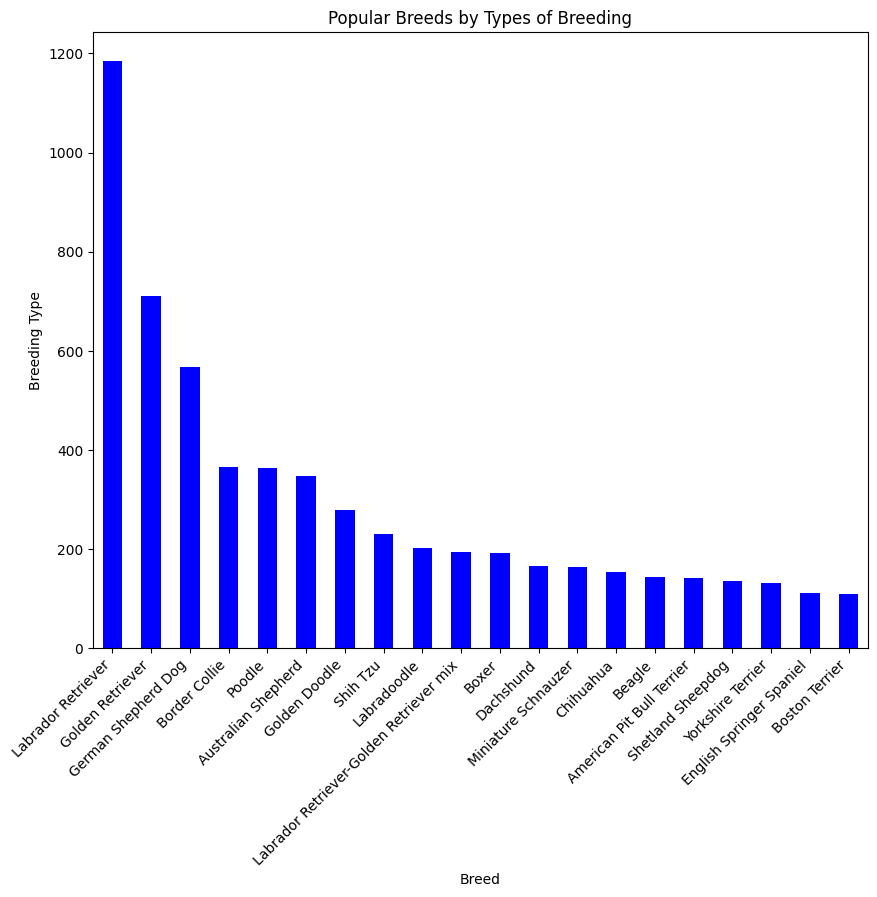

In [159]:
breeding_type = ['Pure Breed', 'Cross Breed', 'Popular Hybrid']
breedingtype = dognitiondf[dognitiondf['Breed_Type'].isin(breeding_type)]
breedcount = breedingtype['Breed'].value_counts().head(20)

plt.figure(figsize = (10, 8))
breedcount.plot( kind = 'bar', color = 'blue')
plt.title('Popular Breeds by Types of Breeding')
plt.xlabel('Breed') 
plt.ylabel('Breeding Type')
plt.xticks(rotation = 45, ha='right')
plt.show()

In [154]:
dognitiondf = dognitiondf[~dognitiondf['Breed'].isin([0, 'Mixed']) <= 3]
dognitiondf['Breed'] = dognitiondf['Breed'].str.replace(r'Mix', 'mix', regex=True, case=False)
totaltests_eachbreed = dognitiondf.groupby('Breed')['Total Tests Completed'].sum()
print(totaltests_eachbreed)

Breed
Affenpinscher                                         98
Affenpinscher-Brussels Griffon mix                    20
Afghan Hound                                          65
Afghan Hound-Akita mix                                 3
Afghan Hound-Golden Retriever mix                     20
                                                    ... 
Yorkshire Terrier-Rat Terrier mix                     20
Yorkshire Terrier-Shih Tzu mix                        64
Yorkshire Terrier-Silky Terrier mix                   27
Yorkshire Terrier-Soft Coated Wheaten Terrier mix      5
mixed                                                222
Name: Total Tests Completed, Length: 1326, dtype: int64


In [ ]:
#dog ownership (maximum dogs by breed)
for Breed in range(1,10):
    for Max_Dogs in range(1,10):
        print(f'{Max_Dogs}*{Breed}={Max_Dogs*Breed:2d}', end=' ') 
    print() # This line belongs to the first loop
    
mostownedbreed = dognitiondf[["Max_Dogs", "Breed"]]
ownedbybreed = owned_breed.groupby(['Breed']).get_group('Labrador Retriever','Shetland Sheepdog',)
print(testsperbreed)

In [ ]:
sns.scatterplot(data = dognitiondf, x = 'Breed_Type', y = 'Breed').head(20)

In [115]:
# of dogs owned now or in a lifetime(user id by max dogs) number of users with dogs
sns.scatterplot(data = dogntiondf, x = 'User ID', y = 'Max_Dogs')

NameError: name 'dogntiondf' is not defined

In [116]:
most_frequent_breed = dognitiondf["Breed"].mode()
uniquebreeds = dognitiondf["Breed"].unique()
breedcounts = dognitiondf["Breed"].valuecounts(1-20)

AttributeError: 'Series' object has no attribute 'valuecounts'